Challenge for TitanicML at 16th July.

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np 
from sklearn import preprocessing

import matplotlib.pyplot as plt

In [68]:
np.random.seed(1919)
### Constants ###
data_folder = "/user/rh186032/datasciencecoursera/TitanicML/input/"
#out_folder = "/user/rh186032/datasciencecoursera/TitanicML/output/"
#batch_size = 4
#nb_epoch = 10

In [69]:
### load train and test ###
ds  = pd.read_csv(data_folder+'train.csv', index_col=0)
ds['Sex'].replace('female', 1, inplace=True)
ds['Sex'].replace('male', 2, inplace=True)

ds['Age'].fillna(ds['Age'].mean(), inplace=True)

ds.dropna(subset=['Fare', 'Embarked'], inplace=True, how='any')

ds['Embarked'].replace('S', 1, inplace=True)
ds['Embarked'].replace('C', 2, inplace=True)
ds['Embarked'].replace('Q', 3, inplace=True)

def normalize(column):
    return (column - column.mean()) / (column.max() - column.min())

age_norm = normalize(ds['Age'])
pclass_norm = normalize(ds['Pclass'])
sex_norm = normalize(ds['Sex'])
sibsp_norm = normalize(ds['SibSp'])
parch_norm = normalize(ds['Parch'])
embarked_norm = normalize(ds['Embarked'])
fare_norm = normalize(ds['Fare'])

print("Data Read complete")

Data Read complete


In [70]:
X_train = np.asarray(pd.concat([age_norm, pclass_norm, sex_norm, sibsp_norm, parch_norm, embarked_norm, fare_norm], axis=1, join='inner'))
Y_train = np.asarray(ds['Survived'])

In [71]:
model = Sequential()

model.add(Dense(output_dim=10, input_dim=7))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
model.add(Activation("linear"))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, input_dim=7)`
  app.launch_new_instance()
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [87]:
filepath = data_folder+'checkpoints/weights.best.hdf5'

In [88]:
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [89]:
#history = model.fit(X_train[:600], Y_train[:600], callbacks=callbacks_list, epochs=40, batch_size=32, verbose=0)
history = model.fit(x=X_train[:600], y=Y_train[:600], batch_size=32, epochs=40, verbose=1, 
                    callbacks=callbacks_list, 
                    validation_split=0.0, 
                    validation_data=None, 
                    shuffle=True, 
                    class_weight=None, 
                    sample_weight=None, 
                    initial_epoch=0)

loss_history = history.history['loss']
acc_history = history.history['acc']
epochs = [(x + 1) for x in range(40)]

Epoch 1/40
600/600 [==============================] - 0s - loss: 0.5072 - acc: 0.7867     
Epoch 2/40
600/600 [==============================] - 0s - loss: 0.4981 - acc: 0.7867     
Epoch 3/40
600/600 [==============================] - 0s - loss: 0.4928 - acc: 0.7833     
Epoch 4/40
600/600 [==============================] - 0s - loss: 0.4873 - acc: 0.7850     
Epoch 5/40
600/600 [==============================] - 0s - loss: 0.4830 - acc: 0.7850     
Epoch 6/40
600/600 [==============================] - 0s - loss: 0.4795 - acc: 0.7850     
Epoch 7/40
600/600 [==============================] - 0s - loss: 0.4768 - acc: 0.7850     
Epoch 8/40
600/600 [==============================] - 0s - loss: 0.4755 - acc: 0.7850     
Epoch 9/40
600/600 [==============================] - 0s - loss: 0.4720 - acc: 0.7850     
Epoch 10/40
600/600 [==============================] - 0s - loss: 0.4706 - acc: 0.7883     
Epoch 11/40
600/600 [==============================] - 0s - loss: 0.4700 - acc: 0.7850   

In [90]:
ax = plt.subplot(211)
ax.plot(epochs, loss_history, color='red')
ax.set_xlabel('Epochs')
ax.set_ylabel('Error Rate\n')
ax.set_title('Error Rate per Epoch\n')

ax2 = plt.subplot(212)
ax2.plot(epochs, acc_history, color='c')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy\n')
ax2.set_title('Accuracy per Epoch\n')

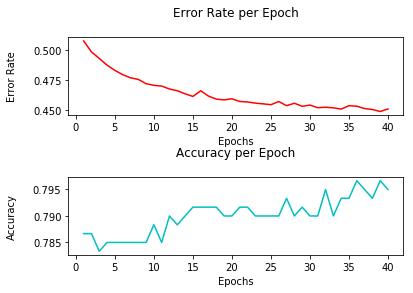

 32/289 [==>...........................] - ETA: 0s[0.4292133620144174, 0.78892733564013839]


In [93]:
plt.subplots_adjust(hspace=0.8)
plt.show()

X_test = X_train[600:]
Y_test = Y_train[600:]

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print(loss_and_metrics)

In [97]:
Y_train[:600]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1,

In [100]:
import csv

f = open(data_folder+'output.csv', 'w')
writer = csv.writer(f, lineterminator='\n')

# データをリストに保持
csvlist = Y_train[0:600]
#csvlist.append("hoge")
#csvlist.append("fuga")

# 出力
writer.writerow(csvlist)

# ファイルクローズ
f.close()